In [107]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [109]:
file_path = r"D:\Documents\Semester 5\ML LAB\processed_plastic_waste_data.csv"
plastic_data = pd.read_csv(file_path)

In [111]:
plastic_data.head(), plastic_data.info(), plastic_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          1584 non-null   object 
 1   State                         1584 non-null   object 
 2   Plastic_Waste_Generation_TPA  1584 non-null   float64
 3   Registered_Units              1584 non-null   int64  
 4   Unregistered_Units            1584 non-null   int64  
 5   Multilayer_Units              1584 non-null   int64  
 6   Partial_Complete_Ban          1584 non-null   object 
 7   Explicit_Pricing              1584 non-null   object 
 8   SLA                           1584 non-null   object 
 9   Population                    1584 non-null   float64
 10  Per_Capita_Waste              1584 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 136.3+ KB


(         Date              State  Plastic_Waste_Generation_TPA  \
 0  01-01-2017     Andhra Pradesh                  82966.213970   
 1  01-01-2017  Arunachal Pradesh                  82966.213970   
 2  01-01-2017              Assam                  24059.931720   
 3  01-01-2017              Bihar                   2282.839963   
 4  01-01-2017       Chhattisgarh                   7309.092864   
 
    Registered_Units  Unregistered_Units  Multilayer_Units  \
 0                64                   0                 0   
 1                 0                   0                 0   
 2                 8                   7                 5   
 3                 0                  32                 0   
 4                 8                   0                 1   
 
   Partial_Complete_Ban Explicit_Pricing  SLA   Population  Per_Capita_Waste  
 0                  Yes              Yes  Yes  1000829.538          0.082897  
 1                   No               No   No  1000829.538      

In [113]:
plastic_data['Date'] = pd.to_datetime(plastic_data['Date'], format='%d-%m-%Y')

In [115]:
duplicate_dates = plastic_data['Date'].duplicated().sum()
print(f"Number of duplicate dates: {duplicate_dates}")

Number of duplicate dates: 1536


In [117]:
plastic_data = plastic_data.drop_duplicates(subset='Date')
plastic_data.set_index('Date', inplace=True)

In [119]:
plastic_data = plastic_data.asfreq('MS')

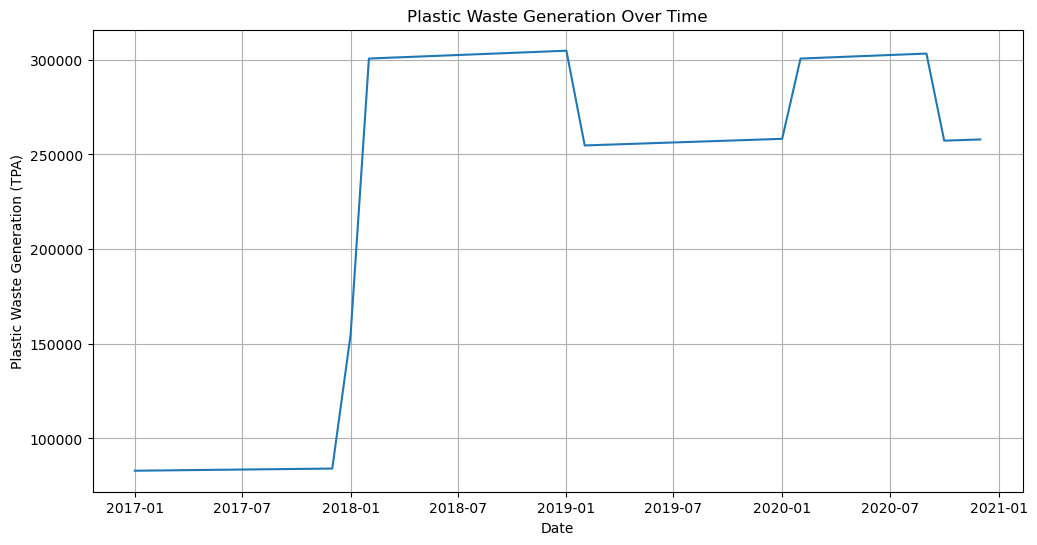

In [121]:
plt.figure(figsize=(12, 6))
plt.plot(plastic_data['Plastic_Waste_Generation_TPA'])
plt.title('Plastic Waste Generation Over Time')
plt.xlabel('Date')
plt.ylabel('Plastic Waste Generation (TPA)')
plt.grid()
plt.show()

In [123]:
adf_test = adfuller(plastic_data['Plastic_Waste_Generation_TPA'])
print(f"ADF Statistic: {adf_test[0]}, p-value: {adf_test[1]}")

ADF Statistic: -1.9443935605722336, p-value: 0.31147360961697135


Differenced Series - ADF Statistic: -4.856473546744213, p-value: 4.235606181661787e-05


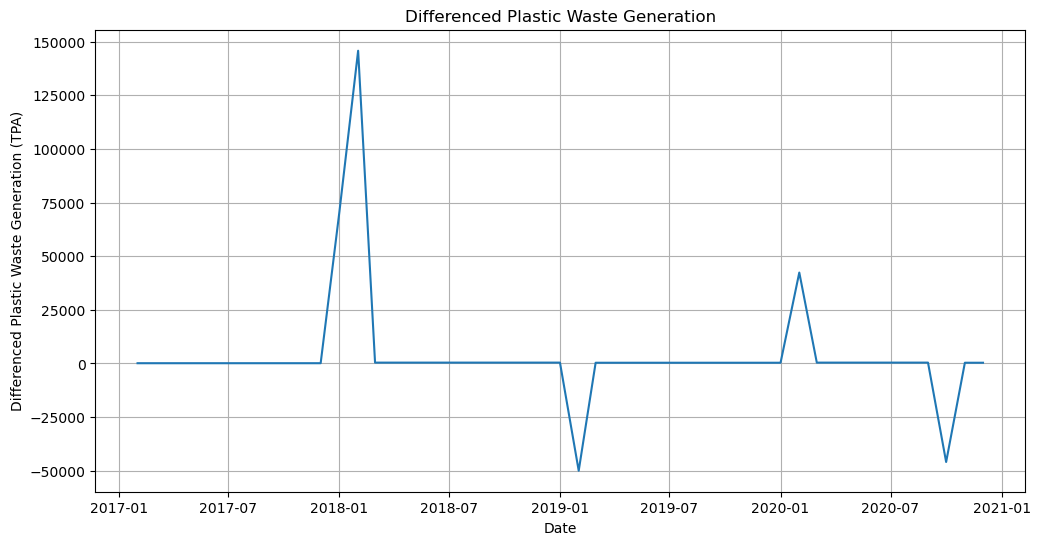

In [125]:
if adf_test[1] > 0.05:
    plastic_data['Plastic_Waste_Generation_TPA_diff'] = plastic_data['Plastic_Waste_Generation_TPA'].diff().dropna()
    
    adf_test_diff = adfuller(plastic_data['Plastic_Waste_Generation_TPA_diff'].dropna())
    print(f"Differenced Series - ADF Statistic: {adf_test_diff[0]}, p-value: {adf_test_diff[1]}")

    plt.figure(figsize=(12, 6))
    plt.plot(plastic_data['Plastic_Waste_Generation_TPA_diff'])
    plt.title('Differenced Plastic Waste Generation')
    plt.xlabel('Date')
    plt.ylabel('Differenced Plastic Waste Generation (TPA)')
    plt.grid()
    plt.show()

In [127]:
train = plastic_data['Plastic_Waste_Generation_TPA'][:-12]
test = plastic_data['Plastic_Waste_Generation_TPA'][-12:]

In [129]:
model = ARIMA(plastic_data['Plastic_Waste_Generation_TPA'].dropna(), order=(1, 1, 1))
arima_result = model.fit()

In [131]:
print(arima_result.summary())

                                    SARIMAX Results                                     
Dep. Variable:     Plastic_Waste_Generation_TPA   No. Observations:                   48
Model:                           ARIMA(1, 1, 1)   Log Likelihood                -542.923
Date:                          Mon, 04 Nov 2024   AIC                           1091.846
Time:                                  11:38:28   BIC                           1097.397
Sample:                              01-01-2017   HQIC                          1093.935
                                   - 12-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0468      0.809     -0.058      0.954      -1.632       1.538
ma.L1          0.3437      0.833      0.413      0.

In [133]:
forecast_steps = 12 
forecast = arima_result.forecast(steps=forecast_steps)

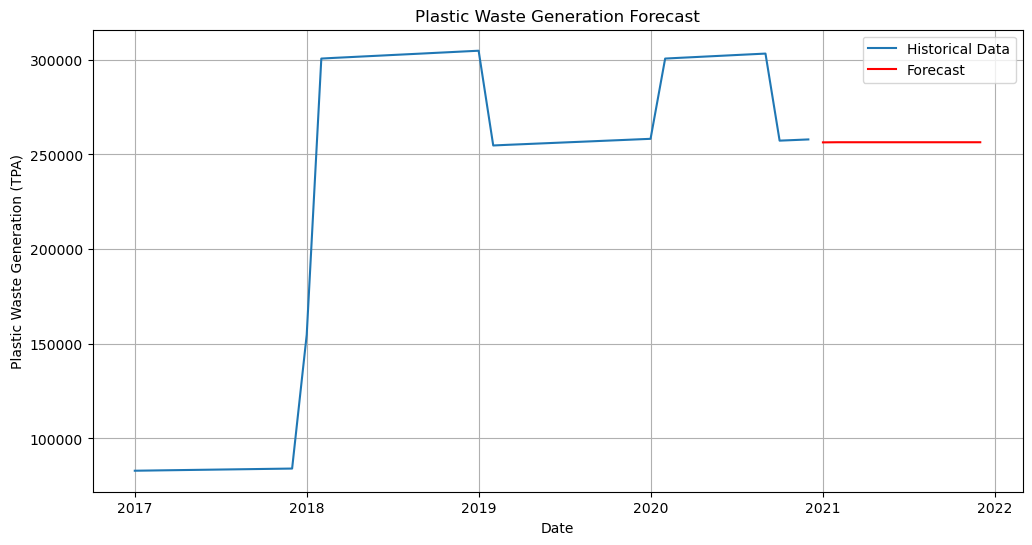

In [135]:
plt.figure(figsize=(12, 6))
plt.plot(plastic_data['Plastic_Waste_Generation_TPA'], label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Plastic Waste Generation Forecast')
plt.xlabel('Date')
plt.ylabel('Plastic Waste Generation (TPA)')
plt.legend()
plt.grid()
plt.show()

In [139]:
mape = mean_absolute_percentage_error(test, forecast)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 10.22%
